# Chapter: Control Charts for Statistical Process Control


# Topic: EWMA Control Chart

In [8]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})
np.random.seed(10)

In [9]:
# generate data
# NOC data
N = 250
x0 = np.random.normal(loc=10, scale=2, size=N)

# faulty data
N = 100
x1 = np.random.normal(loc=11, scale=2, size=N)

# combine data
x = np.hstack((x0,x1))

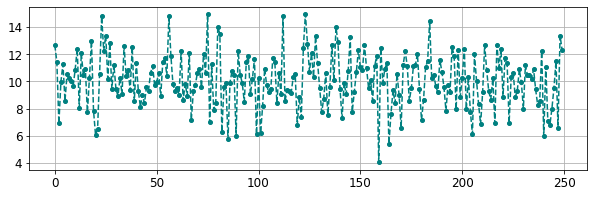

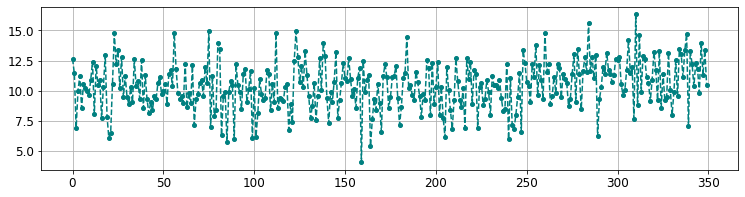

In [10]:
# plots
plt.figure(figsize=(10,3))
plt.plot(x0,'--',marker='o', markersize=4, color='teal')
plt.grid()

plt.figure(figsize=(12.5,3))
plt.plot(x,'--',marker='o', markersize=4, color='teal')
plt.grid()
plt.show()

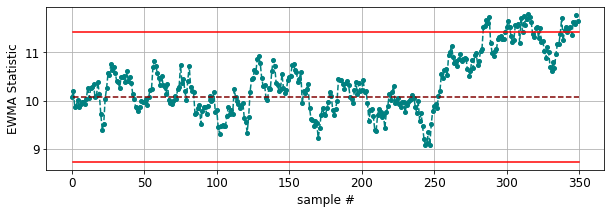

In [11]:
# EWMA chart
mu, sigma = np.mean(x0), np.std(x0)
smoothFactor = 0.1
LCL = mu - 3*sigma*np.sqrt(smoothFactor/(2-smoothFactor))
UCL = mu + 3*sigma*np.sqrt(smoothFactor/(2-smoothFactor))

z = np.zeros((len(x),))
z[0] = mu

for i in range(1,len(x)):
    z[i] = smoothFactor*x[i] + (1-smoothFactor)*z[i-1]

plt.figure(figsize=(10,3))
plt.plot(z,'--',marker='o', markersize=4, color='teal')
plt.plot([1,len(x)],[LCL,LCL], color='red'), plt.plot([1,len(x)],[UCL,UCL], color='red')
plt.plot([1,len(x)],[mu,mu], '--', color='maroon')
plt.xlabel('sample #'), plt.ylabel('EWMA Statistic')
plt.grid()

plt.show()